## Time series pattern recognition with air quality sensor data
### part 3. Point anomaly detection

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>

<div style="text-align: right\"> Initial upload: 2020.1.15 </div>
<div style="text-align: right\"> Last update: 2020.1.15</div>

참고자료  
- https://towardsdatascience.com/time-series-pattern-recognition-with-air-quality-sensor-data-4b94710bb290  
- https://github.com/zhouxu-ds/air-quality-pattern-recognition  
- https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a

Point anomaly를 검출하는 알고리즘을 구현한다.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

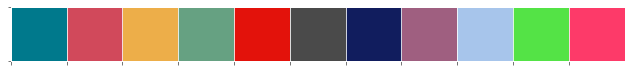

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#e3120b', '#4a4a4a', 
          '#111D5E', '#9F5F80', '#A7C5EB', '#54E346', '#FD3A69']
sns.palplot(sns.color_palette(colors))

In [3]:
import pickle

### 1. 데이터 읽기

In [4]:
# Load dataframes from pickle file
with open('./data_full.pkl', 'rb') as f:
    data, data_norm = pickle.load(f)

In [5]:
data_norm.head(3)

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
timestamp,,,,,,,,,,,
2020-05-26 08:51:45,0.253102,0.000000,0.003282,0.352504,0.485604,0.387991,0.313453,0.069672,0.560304,0.414536,0.431811
2020-05-26 08:52:44,0.261787,0.166667,0.003310,0.353549,0.378375,0.299043,0.238496,0.061475,0.562385,0.411395,0.434904
2020-05-26 08:53:44,0.267990,0.166667,0.003324,0.355075,0.283326,0.223814,0.178401,0.075137,0.562508,0.414536,0.436230


### 2. Point anomaly 알고리즘 구현

rolling median을 기준으로 threshold를 초과하면 이상치로 간주   
앞에서 사용한 outlier 검출방법을 그대로 활용한다.

In [6]:
def is_outlier(data, rolling_median, thresh):
        return abs(data - rolling_median) >= thresh

In [7]:
data_nrm5 = data_norm.rolling(window=5, center = True).median() 
# center를 True로 하면 윈도우 중간을 기준으로 동작함

In [8]:
data_nrm5.head(3)

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
timestamp,,,,,,,,,,,
2020-05-26 08:51:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26 08:52:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-26 08:53:44,0.253102,0.166667,0.003324,0.355075,0.348631,0.275494,0.219684,0.069672,0.562385,0.414536,0.43623


In [9]:
labels = is_outlier(data_norm, data_nrm5, 0.17).astype('int')

In [10]:
labels.head()

,Ozone - Low Conc.,Hydrogen Sulfide - Low Conc.,Total VOCs (ppm) - PID,Carbon Dioxide - Low Conc.,Particulate Matter 1,Particulate Matter 2.5,Particulate Matter 10,Temperature (Internal),Humidity (Internal),Temperature (External),Humidity (External)
timestamp,,,,,,,,,,,
2020-05-26 08:51:45,0,0,0,0,0,0,0,0,0,0,0
2020-05-26 08:52:44,0,0,0,0,0,0,0,0,0,0,0
2020-05-26 08:53:44,0,0,0,0,0,0,0,0,0,0,0
2020-05-26 08:54:44,0,0,0,0,0,0,0,0,0,0,0
2020-05-26 08:55:43,0,0,0,0,0,0,0,0,0,0,0


### 3. 시각화

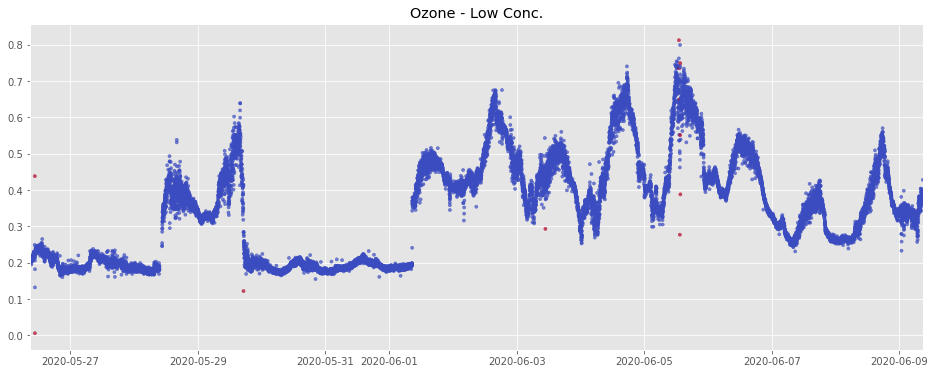

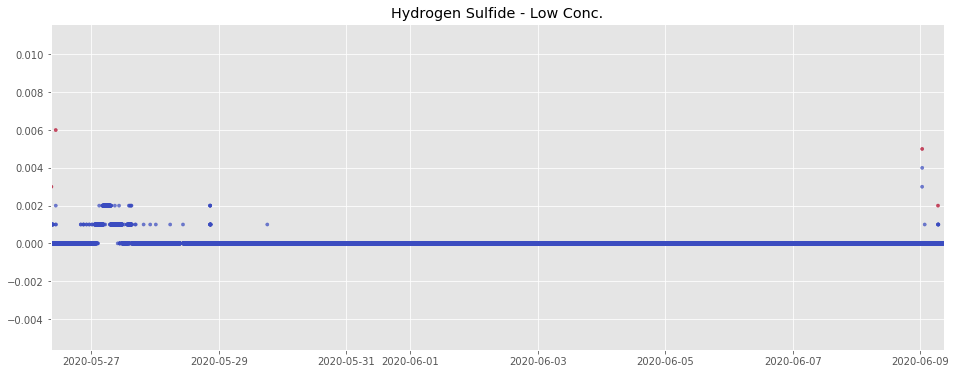

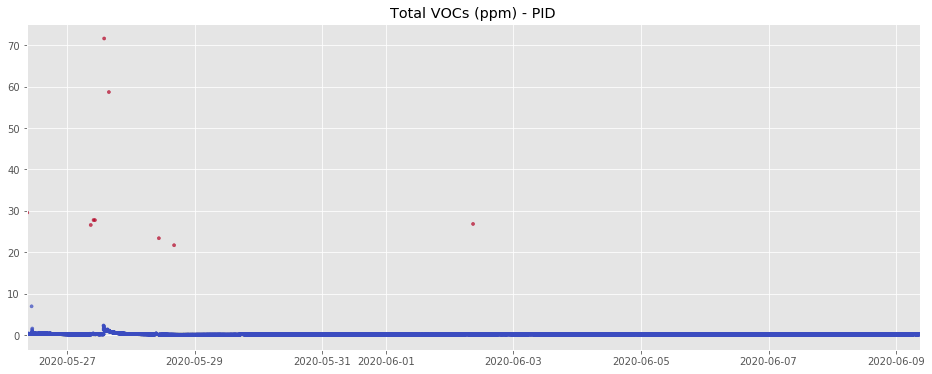

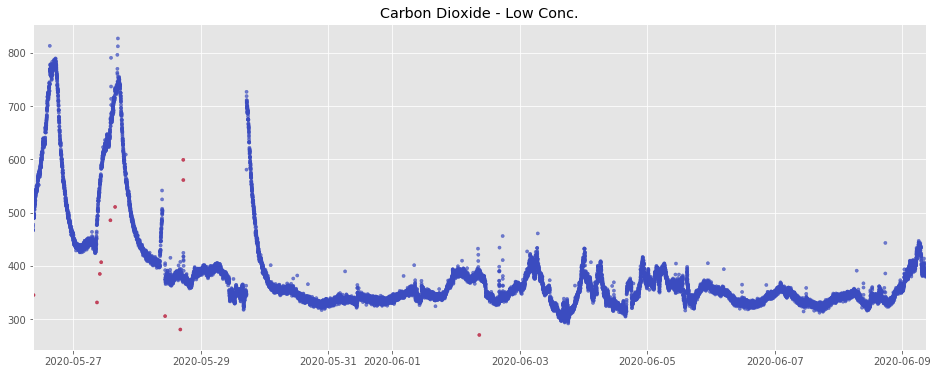

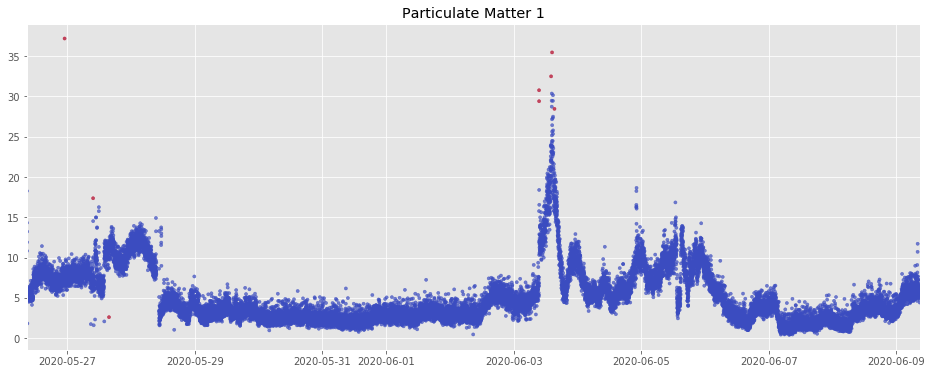

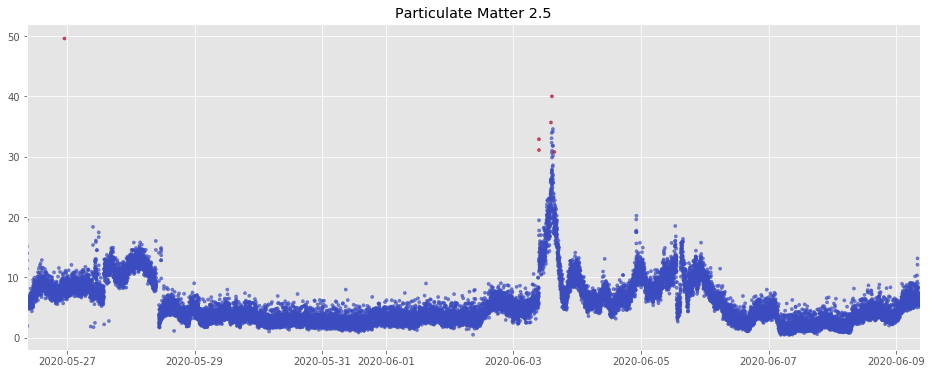

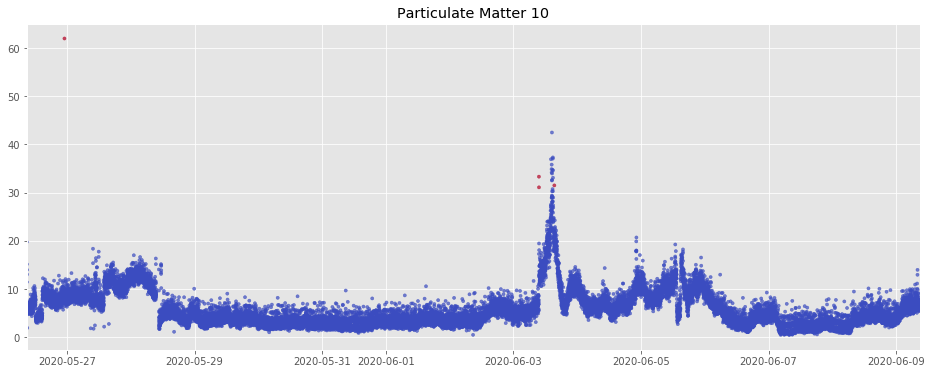

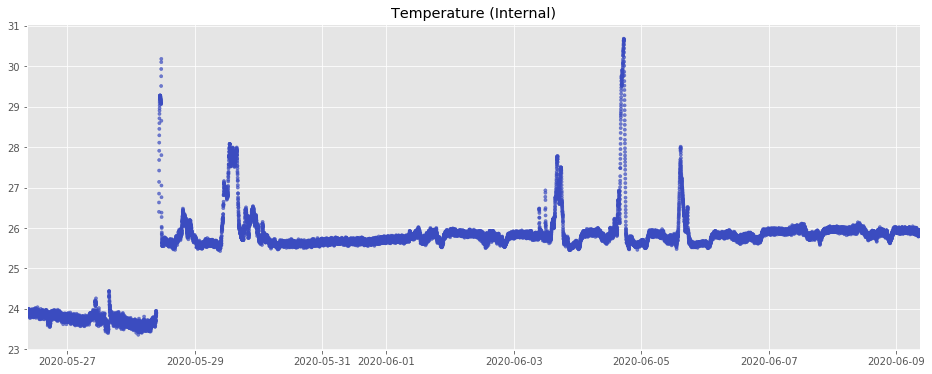

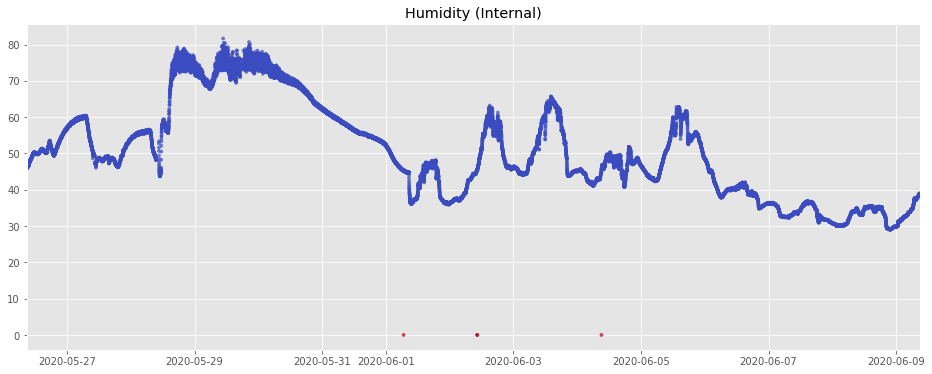

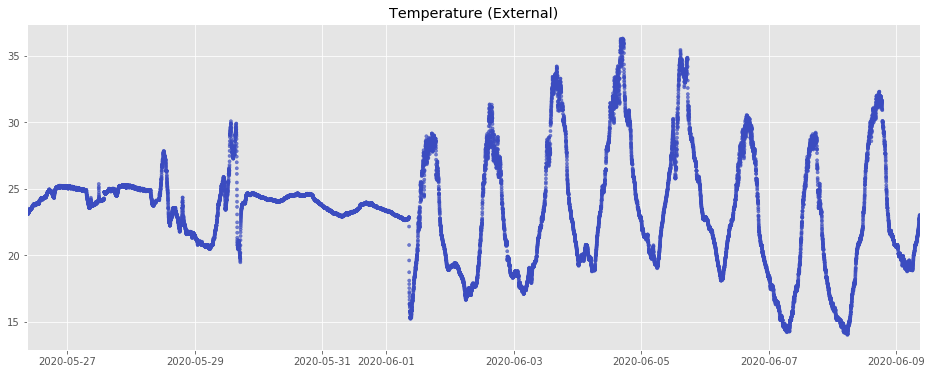

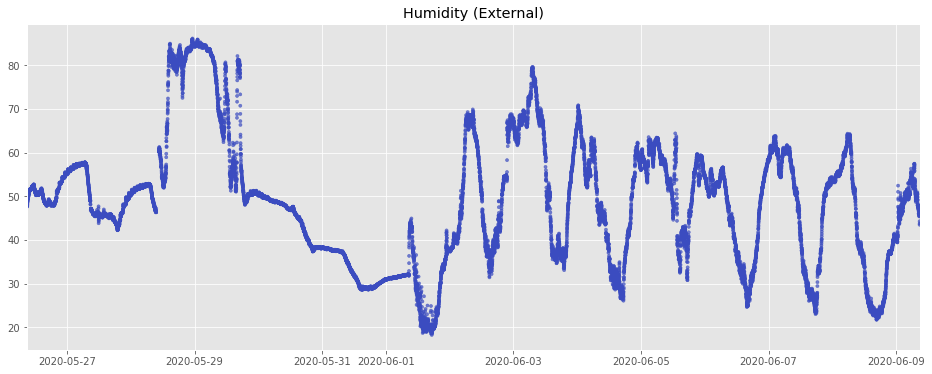

In [11]:
# Plot each of the time series data with outliers labeled
for col in data_norm.columns:
    fig, ax = plt.subplots(figsize=(16, 6))
    plt.scatter(data.index, data[col], c=labels[col], s=10, alpha=0.7, cmap=plt.get_cmap('coolwarm'))
    plt.xlim([data.index[0], data.index[-1]])
    plt.title(col)
plt.show()

anomaly 검출 전후 비교

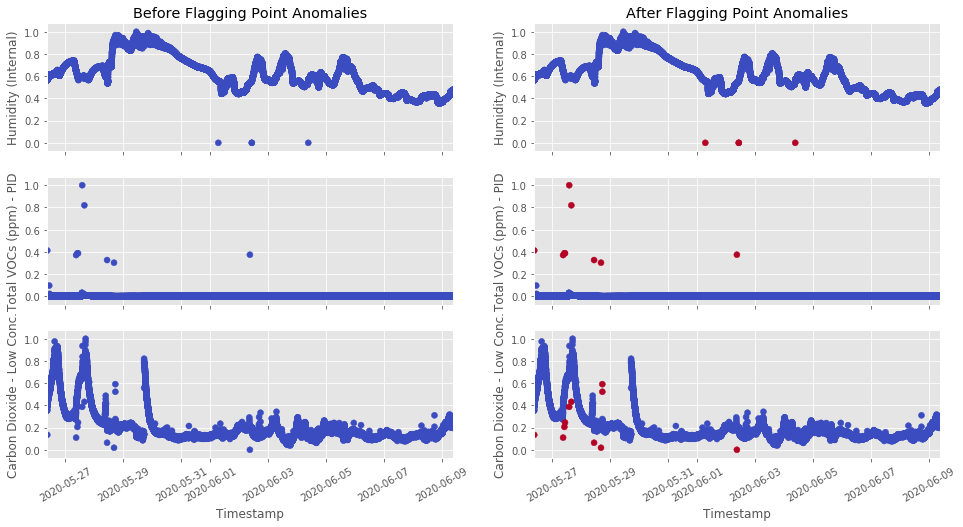

In [12]:

# Comparison of selected time series
tick = ax.get_xticklabels()
ind = [8, 2, 3]
fig, axs = plt.subplots(3, 2, sharex=True, figsize=(16, 8))
axs[0][0].set_title('Before Flagging Point Anomalies')
axs[0][1].set_title('After Flagging Point Anomalies')
for i in range(3):
    series, label = data_norm.iloc[:, ind[i]], labels.iloc[:, ind[i]]
    c = [np.zeros(len(series)), label]
    for j in range(2):
        ax = axs[i][j]
        ax.scatter(series.index, series, c=c[j], cmap=plt.get_cmap('coolwarm'))
        ax.set_xlim(series.index[0], series.index[-1])
        ax.set_ylabel(data_norm.columns[ind[i]])
for j in range(2):
    ax = axs[2][j]
    ax.set_xticklabels(tick, rotation=30)
    ax.set_xlabel('Timestamp')
plt.show()

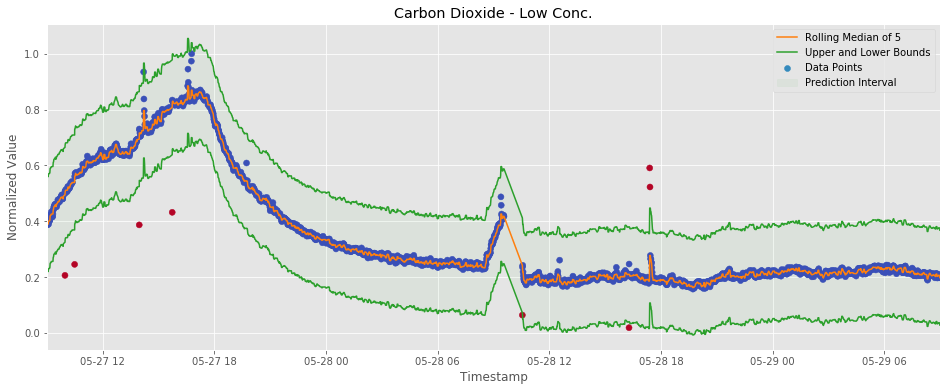

In [13]:
# Zoomed-in scatter plot of Carbon Dioxide, with labeled outliers and prediction interval
t = ['2020-05-27 09:00:00', '2020-05-29 9:00:00']
series = data_norm['Carbon Dioxide - Low Conc.']
series = series.loc[(series.index > t[0]) & (series.index < t[1])]
label = labels['Carbon Dioxide - Low Conc.']
label = label.loc[(label.index > t[0]) & (label.index < t[1])]
series_nrm5 = data_nrm5['Carbon Dioxide - Low Conc.']
series_nrm5 = series_nrm5.loc[(series_nrm5.index > t[0]) & (series_nrm5.index < t[1])]
fig, ax = plt.subplots(figsize=(16, 6))
plt.scatter(series.index, series, c=label, cmap=plt.get_cmap('coolwarm'), label='Data Points')
plt.plot(series_nrm5.index, series_nrm5, color='tab:orange', label='Rolling Median of 5')
plt.plot(series_nrm5.index, series_nrm5+0.17, color='tab:green', label='Upper and Lower Bounds')
plt.plot(series_nrm5.index, series_nrm5-0.17, color='tab:green')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5+0.17, color='tab:green', alpha=0.05, label='Prediction Interval')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5-0.17, color='tab:green', alpha=0.05)
plt.xlim(series.index[0], series.index[-1])
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Carbon Dioxide - Low Conc.')
plt.show()